In [113]:
import os
# root = "/root/code_Bao/Vietnamese_stocks_forecasting" # ubuntu
# root = 'D:\Project\Vietnamese_stocks_forecasting' # win
# os.chdir(root)

In [114]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Draw
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
from matplotlib.offsetbox import AnchoredText
from statsmodels.graphics.tsaplots import plot_pacf
import math

from vnstock import * #Load vietnamese data
import holidays # Load Vietnamese holidays

from tqdm import tqdm
import yaml

from datetime import datetime
from datetime import date
from datetime import timedelta

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

In [115]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Data Processing + EDA 


## Load Data

Here I will make a EDA for MWG (Thegioididong). A Vietnamese stock that is in VN30 (30 biggest VN companies)

In [116]:
symbol = 'MWG'
start_date = "2021-01-01" #(YYYY-MM-DD)
end_date = '2023-07-18'

In [117]:
company_overview(symbol)

,exchange,shortName,industryID,industryIDv2,industry,industryEn,establishedYear,noEmployees,noShareholders,foreignPercent,website,stockRating,deltaInWeek,deltaInMonth,deltaInYear,outstandingShare,issueShare,companyType,ticker
0,HOSE,Thế giới di động,253,5379,Bán lẻ,Retail,2004,40756,20628,0.486,http://www.mwg.vn,3.8,0.038,-0.027,-0.199,1462.6,1463.4,CT,MWG


In [118]:
dividend_history(symbol)

,exerciseDate,cashYear,cashDividendPercentage,issueMethod
0,27/07/23,2022,0.050,cash
1,16/06/22,2022,1.000,share
2,07/06/22,2021,0.100,cash
3,30/08/21,2021,0.500,share
4,30/08/21,2020,0.050,cash
5,19/10/20,2019,0.150,cash
6,23/05/19,2018,0.150,cash
7,19/11/18,2018,0.333,share
8,24/04/18,2017,0.150,cash
9,22/05/17,2016,0.150,cash


In [119]:
financial_ratio(symbol=symbol, report_range='yearly', is_all=False)

year,2022,2021,2020,2019,2018
ticker,MWG,MWG,MWG,MWG,MWG
priceToEarning,15.2,20.0,14.7,13.9,13.9
priceToBook,2.6,4.8,3.7,4.4,4.5
valueBeforeEbitda,7.2,14.1,10.4,6.7,8.1
dividend,0.012,0.015,0.013,0.02,0.15
roe,0.185,0.273,0.284,0.363,0.387
roa,0.069,0.09,0.089,0.11,0.113
daysReceivable,38,26,24,1,4
daysInventory,98,93,97,95,76
daysPayable,39,36,48,41,37


### Financial flow

a quarter of Vietnamese fiscal year
- Q1: 26/4
- Q2: 27/7
- Q3: 24/10
- Q4: 30/1

In [120]:
quarter_date_dict = {
    'Q1': '04-26',
    'Q2': '07-27',
    'Q3': '10-24',
    'Q4': '01-30'
}

In [121]:
incomestatement = financial_flow(symbol=symbol, report_type='incomestatement', report_range='quarterly')
incomestatement.head()

,ticker,revenue,yearRevenueGrowth,quarterRevenueGrowth,costOfGoodSold,grossProfit,operationExpense,operationProfit,yearOperationProfitGrowth,quarterOperationProfitGrowth,interestExpense,preTaxProfit,postTaxProfit,shareHolderIncome,yearShareHolderIncomeGrowth,quarterShareHolderIncomeGrowth,investProfit,serviceProfit,otherProfit,provisionExpense,operationIncome,ebitda
index,,,,,,,,,,,,,,,,,,,,,,
2023-Q2,MWG,29465,-0.142,0.087,-24024,5441,-5440,1,-1.000,-0.992,-385,130,17,17,-0.985,-0.182,None,None,None,None,None,797
2023-Q1,MWG,27106,-0.257,-0.114,-21891,5214,-5109,105,-0.943,-0.898,-296,159,21,21,-0.985,-0.966,None,None,None,None,None,981
2022-Q4,MWG,30588,-0.154,-0.044,-22659,7930,-6896,1034,-0.443,-0.403,-361,933,619,619,-0.604,-0.317,None,None,None,None,None,2031
2022-Q3,MWG,32012,0.316,-0.068,-24620,7392,-5659,1733,1.056,-0.145,-435,1418,907,906,0.154,-0.198,None,None,None,None,None,2599
2022-Q2,MWG,34338,0.085,-0.058,-27001,7336,-5308,2028,0.354,0.097,-366,1702,1131,1130,-0.068,-0.218,None,None,None,None,None,2890


Because the index is in format YYYY-QQ like 2023-Q2 so I have to change the index to YYYY-MM-DD

In [122]:
def convert_quar_idx_2_date (dataframe, idx_col = 'index'):
    dataframe = dataframe.reset_index()
    dataframe['year'] = dataframe[idx_col].str[:4]
    dataframe['quarter'] = dataframe[idx_col].str[-2:]
    dataframe['date'] = dataframe['quarter'].map(quarter_date_dict)
    dataframe[idx_col] = dataframe['year'] + '-' + dataframe['date']
    return dataframe

In [123]:
incomestatement = convert_quar_idx_2_date(incomestatement, idx_col = 'index')

In [124]:
incomestatement.head()

,index,ticker,revenue,yearRevenueGrowth,quarterRevenueGrowth,costOfGoodSold,grossProfit,operationExpense,operationProfit,yearOperationProfitGrowth,quarterOperationProfitGrowth,interestExpense,preTaxProfit,postTaxProfit,shareHolderIncome,yearShareHolderIncomeGrowth,quarterShareHolderIncomeGrowth,investProfit,serviceProfit,otherProfit,provisionExpense,operationIncome,ebitda,year,quarter,date
0,2023-07-27,MWG,29465,-0.142,0.087,-24024,5441,-5440,1,-1.000,-0.992,-385,130,17,17,-0.985,-0.182,None,None,None,None,None,797,2023,Q2,07-27
1,2023-04-26,MWG,27106,-0.257,-0.114,-21891,5214,-5109,105,-0.943,-0.898,-296,159,21,21,-0.985,-0.966,None,None,None,None,None,981,2023,Q1,04-26
2,2022-01-30,MWG,30588,-0.154,-0.044,-22659,7930,-6896,1034,-0.443,-0.403,-361,933,619,619,-0.604,-0.317,None,None,None,None,None,2031,2022,Q4,01-30
3,2022-10-24,MWG,32012,0.316,-0.068,-24620,7392,-5659,1733,1.056,-0.145,-435,1418,907,906,0.154,-0.198,None,None,None,None,None,2599,2022,Q3,10-24
4,2022-07-27,MWG,34338,0.085,-0.058,-27001,7336,-5308,2028,0.354,0.097,-366,1702,1131,1130,-0.068,-0.218,None,None,None,None,None,2890,2022,Q2,07-27


In [125]:
financial_flow(symbol=symbol, report_type='balancesheet', report_range='quarterly').head()

,ticker,shortAsset,cash,shortInvest,shortReceivable,inventory,longAsset,fixedAsset,asset,debt,shortDebt,longDebt,equity,capital,centralBankDeposit,otherBankDeposit,otherBankLoan,stockInvest,customerLoan,badLoan,provision,netCustomerLoan,otherAsset,otherBankCredit,oweOtherBank,oweCentralBank,valuablePaper,payableInterest,receivableInterest,deposit,otherDebt,fund,unDistributedIncome,minorShareHolderProfit,payable
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-Q2,MWG,49859,3442,20979,2616,22122,9509,8196,59369,36136,16337,5899,23232,14634,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2427,None,0.0,13,36136
2023-Q1,MWG,43359,2781,17028,1916,20957,10560,9102,53919,29966,11313,5901,23953,14639,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,3266,None,0.0,15,29966
2022-Q4,MWG,44631,5061,10059,3072,25696,11203,9728,55834,31902,10688,5901,23933,14639,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2972,None,0.0,15,31902
2022-Q3,MWG,50122,7065,8846,4648,28688,11160,9430,61282,37969,16857,5968,23313,14639,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,816,None,0.0,15,37969
2022-Q2,MWG,48129,2898,12321,3756,28254,11088,9537,59217,36813,22345,0,22404,14639,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,576,None,0.0,13,36813


In [126]:
df_test = financial_flow(symbol=symbol, report_type='cashflow', report_range='quarterly')

In [127]:
df_test.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          39 non-null     object
 1   ticker         39 non-null     object
 2   investCost     39 non-null     int64 
 3   fromInvest     39 non-null     int64 
 4   fromFinancial  39 non-null     int64 
 5   fromSale       39 non-null     int64 
 6   freeCashFlow   39 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 2.3+ KB


In [128]:
df =  stock_historical_data(symbol=symbol, 
                            start_date=start_date, 
                            end_date=end_date, resolution='1D', type='stock')
df.head(5)

,time,open,high,low,close,volume,ticker
0,2021-01-04,39080,39430,39010,39430,1147400,MWG
1,2021-01-05,39230,40090,39100,39860,967500,MWG
2,2021-01-06,40210,40210,39460,39660,995500,MWG
3,2021-01-07,39400,39630,39130,39500,1118100,MWG
4,2021-01-08,39500,40180,39500,39830,1277600,MWG


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    633 non-null    object
 1   open    633 non-null    int64 
 2   high    633 non-null    int64 
 3   low     633 non-null    int64 
 4   close   633 non-null    int64 
 5   volume  633 non-null    int64 
 6   ticker  633 non-null    object
dtypes: int64(5), object(2)
memory usage: 34.7+ KB


For EDA 1 stock in 2 years, it cost not much memory. However, when working with hundreds of stocks we have to be so sure about the datatype that we use. It will save coputational cost, and the model will run faster

In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,633.0,5.429061e+04,1.210169e+04,34910.0,42990.0,52990.0,65440.0,79220.0
high,633.0,5.506992e+04,1.226011e+04,37590.0,43580.0,53930.0,66180.0,80110.0
low,633.0,5.349274e+04,1.188066e+04,34910.0,42390.0,52300.0,64760.0,78290.0
close,633.0,5.433377e+04,1.208802e+04,37290.0,42940.0,53240.0,65640.0,78820.0
volume,633.0,2.032427e+06,1.538157e+06,310500.0,954300.0,1531100.0,2616900.0,10847500.0


In [131]:
def convert_types(dataframe):
    dataframe["time"] = pd.to_datetime(dataframe['time'],format='mixed', dayfirst=False,errors="coerce") 
    dataframe['ticker'] = dataframe['ticker'].astype('category')
    dataframe['volume'] = dataframe['volume'].astype(int)
    for col in ['open','high','low','close']:
        dataframe[col] = dataframe[col].astype(np.uint16)
    return dataframe
df = convert_types(df)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    633 non-null    datetime64[ns]
 1   open    633 non-null    uint16        
 2   high    633 non-null    uint16        
 3   low     633 non-null    uint16        
 4   close   633 non-null    uint16        
 5   volume  633 non-null    int64         
 6   ticker  633 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), uint16(4)
memory usage: 15.7 KB


In [133]:
 # Find duplicate rows
duplicate_rows = df[df.duplicated()]
# Count the number of duplicate rows
number_of_duplicate_rows = len(duplicate_rows)
print('There are {} duplicate rows.'.format(number_of_duplicate_rows))
# Remove duplicate rows
df = df.drop_duplicates()

There are 0 duplicate rows.


In [134]:
cat_cols = ['ticker']
num_cols  = ['open','high','low','close']

In [135]:
def summarize_categoricals(df, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[df[c].unique(), len(df[c].unique()), df[c].isnull().sum()] for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns,
                           columns=['Levels', 'No. of Levels', 'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]

In [136]:
summarize_categoricals(df[cat_cols], show_levels=True)

,Levels,No. of Levels,No. of Missing Values
ticker,"['MWG'] Categories (1, object): ['MWG']",1,0


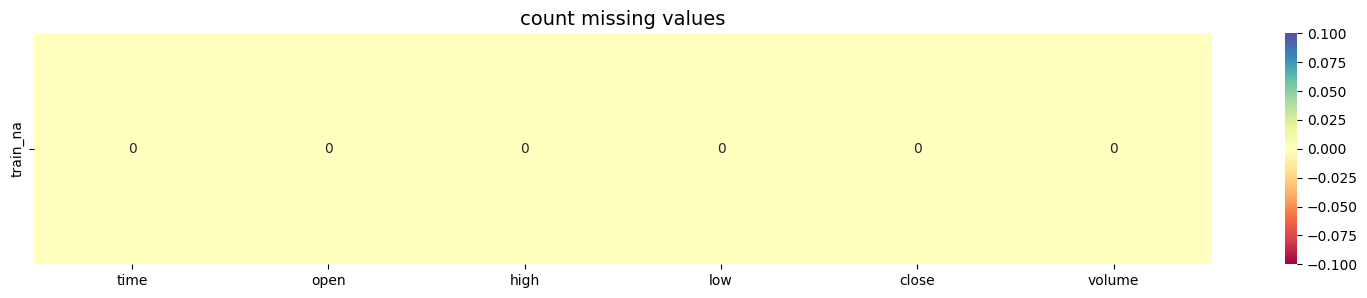

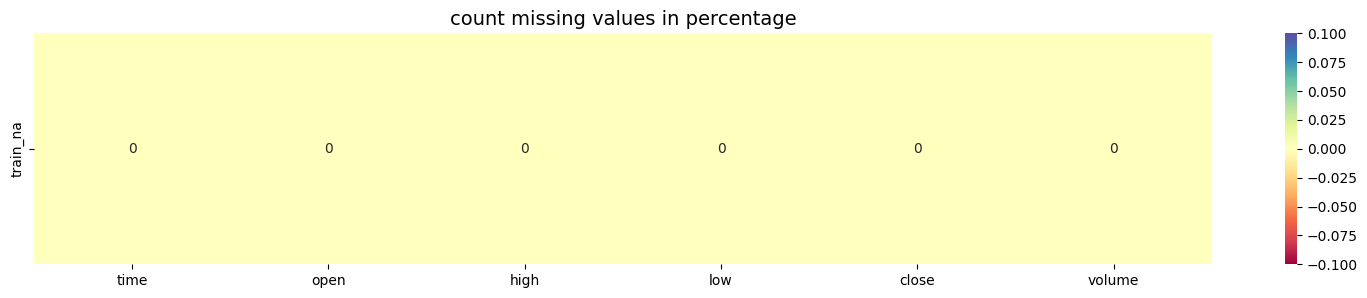

In [137]:
def missing_values_visualize(dataframe, label_col = 'ticker'):
    # Hiển thị có bao nhiêu mising values ở mới feature
    plt.figure(figsize=(19,3))
    sns.heatmap((dataframe.drop(columns=label_col).isna().sum()).to_frame(name='train_na').T,cmap='Spectral', 
                annot=True, fmt='0.0f').set_title('count missing values', fontsize=14)
    plt.figure(figsize=(19,3))
    sns.heatmap(((dataframe.drop(columns=label_col).isna().sum()/dataframe.shape[0])*100).to_frame(name='train_na').T,cmap='Spectral', 
                annot=True, fmt='0.0f').set_title('count missing values in percentage', fontsize=14)
missing_values_visualize(df)

In [138]:
columns_with_few_non_nulls = df.columns[df.notna().sum() < 0.03*len(df)]
# Print the list of columns
print(columns_with_few_non_nulls)
drop_cols = (columns_with_few_non_nulls.to_list())
df.drop(columns_with_few_non_nulls.to_list(), axis=1, inplace=True)

Index([], dtype='object')


These functions here are redundant because our data obviously don't need them. However, they are quite useful when working with data that has a lot of columns and levels, with missing values 

In [139]:
df_temp = df.copy()

## Clean Data 


Assuming you have the 'df' DataFrame

Add month and holidays </br>
Because there is no holidays during trading, so I will create holiday lags (3-7 days)

In [140]:
vn_holidays = holidays.VN()

In [141]:
def time_engineer(dataframe, date_col='time', holidays=vn_holidays, holiday_offset:int = 3):
    dataframe[date_col] = pd.to_datetime(dataframe[date_col])
    dataframe['holidays'] = dataframe[date_col].apply(lambda x: 1 if (x + pd.DateOffset(holiday_offset)) in holidays else 0).astype(bool) # create lagged holidays
    dataframe['day_in_week'] = dataframe[date_col].dt.day_name()
    dataframe['day_in_month'] = dataframe[date_col].dt.day
    dataframe['day_in_year'] = dataframe[date_col].dt.dayofyear
    dataframe['month_in_year'] = dataframe[date_col].dt.month
    dataframe['weekend'] = (dataframe['day_in_week'] == 'Saturday') | (dataframe['day_in_week'] == 'Sunday')
    return dataframe

In [142]:
df = time_engineer(df)

In [143]:
df.head()

,time,open,high,low,close,volume,ticker,holidays,day_in_week,day_in_month,day_in_year,month_in_year,weekend
0,2021-01-04,39080,39430,39010,39430,1147400,MWG,False,Monday,4,4,1,False
1,2021-01-05,39230,40090,39100,39860,967500,MWG,False,Tuesday,5,5,1,False
2,2021-01-06,40210,40210,39460,39660,995500,MWG,False,Wednesday,6,6,1,False
3,2021-01-07,39400,39630,39130,39500,1118100,MWG,False,Thursday,7,7,1,False
4,2021-01-08,39500,40180,39500,39830,1277600,MWG,False,Friday,8,8,1,False


In [144]:
df[df['holidays']==1].head() 

,time,open,high,low,close,volume,ticker,holidays,day_in_week,day_in_month,day_in_year,month_in_year,weekend
25,2021-02-08,42500,42600,41140,42020,1952500,MWG,True,Monday,8,39,2,False
26,2021-02-09,41850,42500,41190,42340,1326800,MWG,True,Tuesday,9,40,2,False
75,2021-04-27,46590,47080,45940,46390,818300,MWG,True,Tuesday,27,117,4,False
76,2021-04-28,45770,46270,45440,45770,994100,MWG,True,Wednesday,28,118,4,False
162,2021-08-30,54670,55260,54430,54430,1266900,MWG,True,Monday,30,242,8,False


## Lagged Features

In [145]:
def plot_lag(x, lag=1, ax=None, **kwargs):
    x_ = x.shift(lag)
    y_ = x
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line = dict(color='C3', )

    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    
    # Adding correlation on plot
    at = AnchoredText(
        f"{y_.corr(x_):.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax

def plot_autocorrelation(x, lags=6, lagplot_kwargs={}, **kwargs):
    kwargs.setdefault("nrows", 2)
    kwargs.setdefault("ncols", math.ceil(lags / 2))
    kwargs.setdefault("figsize", (kwargs["ncols"] *2, 2  * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(2 * kwargs["ncols"])):
        if k + 1 <= lags:
            ax = plot_lag(x, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag #{k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis("off")
    plt.setp(axs[-1, :]
, xlabel=x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

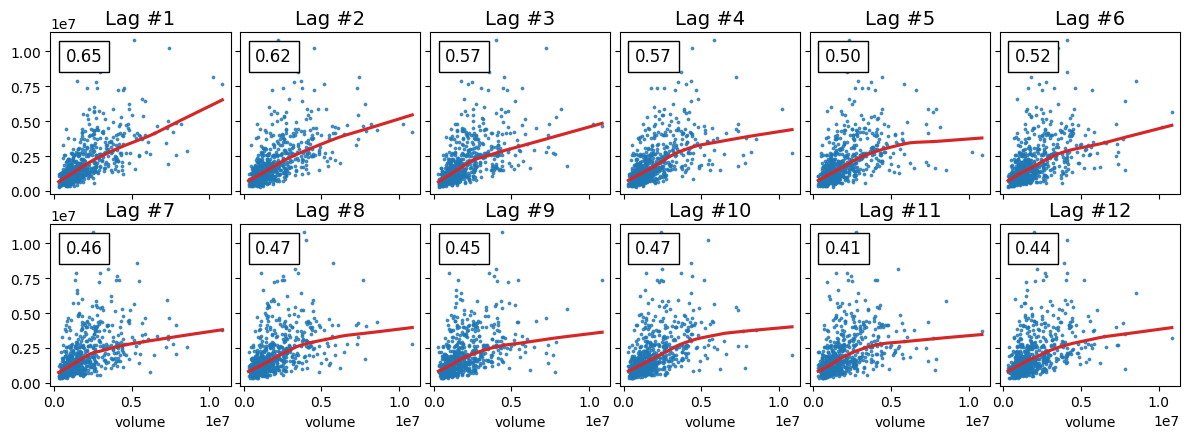

In [146]:
# Use the `df_avg_consumption` dataframe from the previous article.
_ = plot_autocorrelation(df["volume"], lags=12)

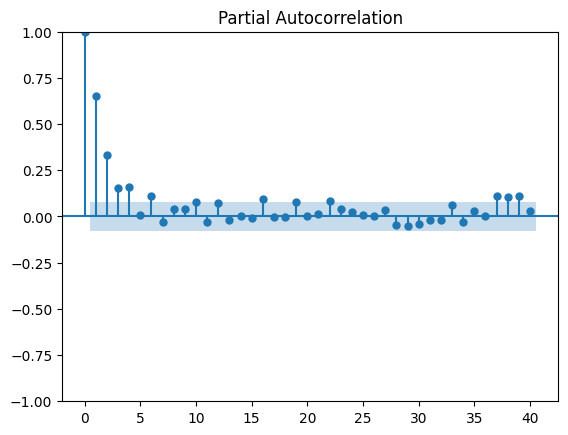

In [147]:
_ = plot_pacf(df["volume"], lags=40)

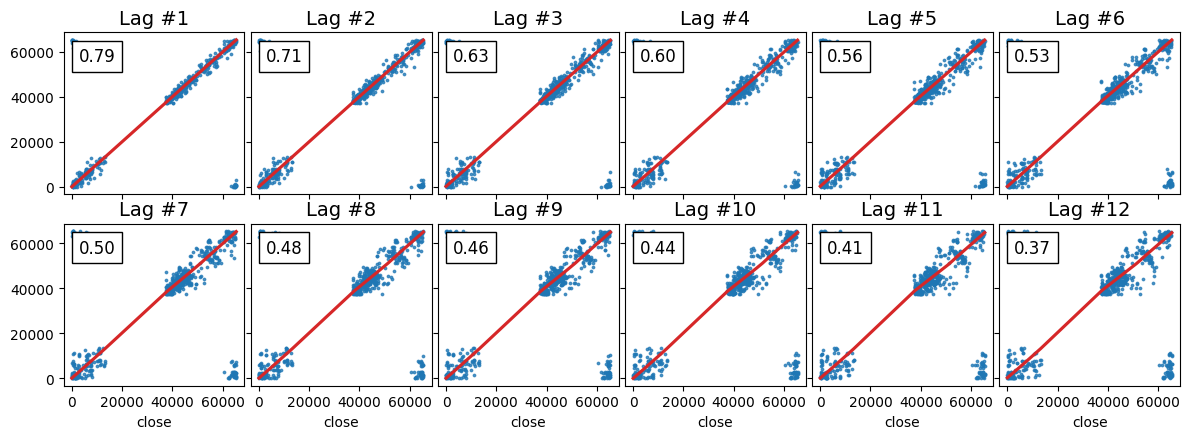

In [148]:
_ = plot_autocorrelation(df["close"], lags=12)

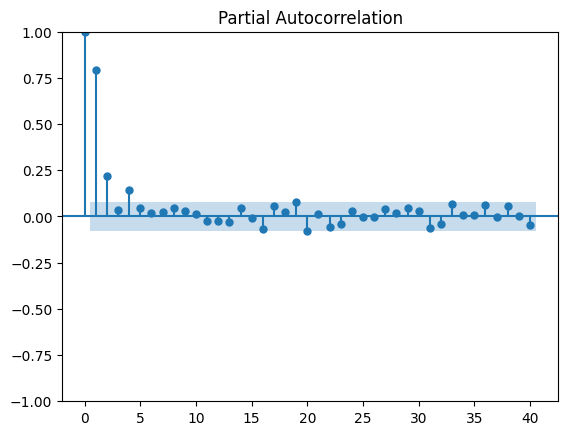

In [149]:
_ = plot_pacf(df["close"], lags=40)

In [150]:
def create_lag_features(dataframe, lag_dict:dict = {'close': [1,2,30]}, group_id = 'ticker'):
    '''Create lagged columns
    Args:
        dataframe: the dataframe we want to create lagged features
        lag_dict: (Dict[str, List[int]]) dictionary of variable names mapped to list of time steps by which the variable should be lagged
    return:
        dataframe: the dataframe include lagged features
    '''
    for col, lags in lag_dict.items():
        for lag in lags:
            new_col_name = f"{col}_lagged_by_{lag}"
            dataframe[new_col_name] = dataframe.sort_values('time').groupby(group_id, observed=True)[col].shift(periods=lag, fill_value=None)
    
    return dataframe

lag_dict = {'close': [1,2,3],
            'volume': [1,2,3],}
df_laged = create_lag_features(df, lag_dict)

In [151]:
df_laged.head()

,time,open,high,low,close,volume,ticker,holidays,day_in_week,day_in_month,day_in_year,month_in_year,weekend,close_lagged_by_1,close_lagged_by_2,close_lagged_by_3,volume_lagged_by_1,volume_lagged_by_2,volume_lagged_by_3
0,2021-01-04,39080,39430,39010,39430,1147400,MWG,False,Monday,4,4,1,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-05,39230,40090,39100,39860,967500,MWG,False,Tuesday,5,5,1,False,39430.0,NaN,NaN,1147400.0,NaN,NaN
2,2021-01-06,40210,40210,39460,39660,995500,MWG,False,Wednesday,6,6,1,False,39860.0,39430.0,NaN,967500.0,1147400.0,NaN
3,2021-01-07,39400,39630,39130,39500,1118100,MWG,False,Thursday,7,7,1,False,39660.0,39860.0,39430.0,995500.0,967500.0,1147400.0
4,2021-01-08,39500,40180,39500,39830,1277600,MWG,False,Friday,8,8,1,False,39500.0,39660.0,39860.0,1118100.0,995500.0,967500.0


# DỮ LIỆU RỜI RẠC 

In [152]:
# df['RECORD_STATUS'] = df['RECORD_STATUS'].replace({'O': False, 'C': True}).astype(bool)

Assuming 'df' is your DataFrame

In [153]:
# def top_k_count_plot(dataframe, col, k=10):
    
#     top_branch_codes = dataframe[col].value_counts().nlargest(k)
#     sorted_top_codes = top_branch_codes.sort_values(ascending=False).index
#     # Create the subplots
#     fig, axes = plt.subplots(1, 2, figsize=(20, 7))
#     sns.countplot(data=dataframe, y=col, palette='magma', ax=axes[0], order=sorted_top_codes).set_title(f'Count of Top {k} {col}', fontsize=12)
#     sns.countplot(data=dataframe, y=col, palette='mako', hue='RECORD_STATUS', ax=axes[1], order=sorted_top_codes).set_title(f'Count of {col} per RECORD_STATUS', fontsize=12)
#     # Display the plots
#     plt.tight_layout()
#     plt.show()

In [154]:
# fig, axes = plt.subplots(len(cat_cols), 2, figsize=(15, 7 * (len(cat_cols))))
# idx = 0
# k = 10
# excluded_cols = []
# for col in cat_cols:
#     value_order = df[col].value_counts().nlargest(k).sort_values(ascending=False).index
#     sns.countplot(data=df, y=col, palette='magma', orient='h', ax=axes[idx][0], order = value_order).set_title(f'Count of Top {k} {col}', fontsize='12')
#     sns.countplot(data=df, y=col, palette='mako', orient='h', hue='RECORD_STATUS', ax=axes[idx][1], order = value_order).set_title(f'Count of {col} per RECORD_STATUS', fontsize='12')
#     idx += 1
#     if df[col].nunique() > k:
#         excluded_cols.append(col)
# plt.show()
# print (f'Columns that has more than {k} classes: {excluded_cols}')

In [155]:
# def count_plot(df, col="col1", hue="col2", figsize=(1500, 500), xrotation=0):
#     '''Vẽ mối quan hệ giữa 2 biến'''
#     fig = px.histogram(df, x=col, color=hue, barmode='group', nbins=len(df[col].unique()))

#     # Calculate percentage values and add them as text annotations
#     total_counts = df.groupby([col, hue]).size().unstack().fillna(0)
#     total_counts_percentage = total_counts.div(total_counts.sum(axis=1), axis=0) * 100
#     annotations = []
#     for category in total_counts_percentage.index:
#         for group in total_counts_percentage.columns:
#             percentage = total_counts_percentage.loc[category, group]
#             annotations.append(
#                 {
#                     "x": category,
#                     "y": total_counts.loc[category, group],
#                     "text": f"{percentage:.2f}%",
#                     "showarrow": False,
#                 }
#             )
#     fig.update_layout(annotations=annotations)

#     # Customize the layout
#     fig.update_layout(
#         barmode="group",
#         legend=dict(x=1.02, y=0.5),
#         width=figsize[0],
#         height=figsize[1],
#         xaxis_title=col,
#         yaxis_title="Count",
#     )

#     # Rotate x-axis labels
#     fig.update_xaxes(tickangle=xrotation)

#     # Show the plot
#     fig.show()

In [156]:
df.head()

,time,open,high,low,close,volume,ticker,holidays,day_in_week,day_in_month,day_in_year,month_in_year,weekend,close_lagged_by_1,close_lagged_by_2,close_lagged_by_3,volume_lagged_by_1,volume_lagged_by_2,volume_lagged_by_3
0,2021-01-04,39080,39430,39010,39430,1147400,MWG,False,Monday,4,4,1,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-05,39230,40090,39100,39860,967500,MWG,False,Tuesday,5,5,1,False,39430.0,NaN,NaN,1147400.0,NaN,NaN
2,2021-01-06,40210,40210,39460,39660,995500,MWG,False,Wednesday,6,6,1,False,39860.0,39430.0,NaN,967500.0,1147400.0,NaN
3,2021-01-07,39400,39630,39130,39500,1118100,MWG,False,Thursday,7,7,1,False,39660.0,39860.0,39430.0,995500.0,967500.0,1147400.0
4,2021-01-08,39500,40180,39500,39830,1277600,MWG,False,Friday,8,8,1,False,39500.0,39660.0,39860.0,1118100.0,995500.0,967500.0


In [157]:
df_test = df.copy(deep=True)

In [158]:
class Plot:
    def __init__(self, dataframe, cols_2_plot:list, holiday:dict = None, ticker:list = [], time_mode:str ='day'):
        self.dataframe = dataframe
        self.cols_2_plot = cols_2_plot
        self.time_mode = time_mode
        self.ticker = ticker
        self.holiday = holiday

    def get_filtered_data(self):
        '''
        If provide ticker then filter the dataframe of that customer 
        '''
        if self.ticker:
            return self.dataframe.loc[self.dataframe['ticker'].isin(self.ticker)].sort_values(by='time', ascending=True)
        else:
            return self.dataframe
        
    def sum_transaction(self):
        '''
        Sum transaction as time_mode = ['day', 'month']
        '''
        filtered_df = self.get_filtered_data()
        sum_df = filtered_df.groupby('time')[self.cols_2_plot].sum()
        if self.time_mode == 'month':
            sum_df = sum_df.resample('M').sum().reset_index()
        elif self.time_mode == 'day':
            sum_df = sum_df.reset_index()
        
        if self.holiday:
            sum_df['holidays'] = sum_df['time'].apply(lambda x: 1 if x in self.holiday else 0)
        return sum_df
    
    def calculate_MA(self, window_width_list:list = [10], plot = False):
        '''
        Calculate Moving Average
        window_width_list:list = [10]
        plot: True/False: plot MA or not
        '''
        sum_df = self.sum_transaction()
        for window_width in window_width_list:
            for col in self.cols_2_plot:
                col_name_ma = f"{col}_MA_{window_width}"
                sum_df[col_name_ma] = sum_df[col].rolling(window=window_width).mean().astype(np.float32)
        if plot == True:
            self.plot_MA(sum_df, window_width_list)
        return sum_df
    
    def plot_MA(self, sum_df, window_width_list):
        '''Plot the moving averages'''
        fig = go.Figure()
        for col in self.cols_2_plot:
            for window_width in window_width_list:
                col_name_ma = f"{col}_MA_{window_width}"
                fig.add_trace(go.Scatter(x=sum_df['time'], y=sum_df[col_name_ma], mode='lines', name=f'{col}_MA_{window_width}'))

        # Mark holidays with markers on the plot
        if self.holiday is not None:
            self.add_holiday_2_plot(fig)
        fig.update_layout(title='Moving Averages',
                            yaxis=dict(title='Moving Average', rangemode='tozero'),
                            legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
                            xaxis_tickangle=45)
        fig.show()
    
    def calculate_pct_change(self):
        '''
        Calculate the percentage change of the value next row
        '''
        sum_df = self.sum_transaction()
        pct_change_df = sum_df[self.cols_2_plot].pct_change()
        # Replace "inf" with NaN
        pct_change_df.replace([np.inf, -np.inf], np.nan, inplace=True)
        pct_change_df['time'] = sum_df['time']
        return pct_change_df
    
    def plot_seasonal_decomposition(self, model='additive', period=30):
        '''
        model : {"additive", "multiplicative"}
        Period: the T period
        '''
        sum_df = self.sum_transaction()
        for col in self.cols_2_plot:
            decomposed_result = sm.tsa.seasonal_decompose(sum_df[col], period=period, model=model)
            figure = decomposed_result.plot()
        plt.tight_layout()
        plt.show()
        
    def check_stationary(self):
        ''''Check if the time series is stationary with adfuller'''
        sum_df = self.sum_transaction()
        for col in self.cols_2_plot:
            result = adfuller(sum_df[col], autolag='AIC')
            print(f'{col} ADF Statistic: {result[0]}')
            print(f'{col} n_lags: {result[1]}')
            print(f'{col} p-value: {result[1]} \n\n')
            
        for key, value in result[4].items():
            print('Critial Values:')
            print(f'   {key}, {value}')

    def add_holiday_2_plot(self,fig):
        sum_df = self.sum_transaction()
        holiday_dates = sum_df[sum_df['holidays'] == 1]['time']
        for date in holiday_dates:
            fig.add_shape(dict(type="line",x0=date,x1=date,y0=0,y1=1,xref="x",yref="paper",line=dict(color="red", width=1),))

    def sum_plot(self):
        '''Plot the sum_transaction and calculate_pct_change'''
        sum_df = self.sum_transaction()
        pct_change_df = self.calculate_pct_change()
        
        fig = go.Figure()
        
        for col in self.cols_2_plot:
            fig.add_trace(go.Scatter(x=sum_df['time'], y=sum_df[col], mode='lines', name=f'Sum_{col}'))
            fig.add_trace(go.Scatter(x=pct_change_df['time'], y=pct_change_df[col], mode='lines', name=f'Pct_Change_{col}', yaxis="y2"))

        # Mark holidays with markers on the plot
        if self.holiday is not None:
            # holiday_dates = sum_df[sum_df['holidays'] == 1]['time']
            # for date in holiday_dates:
            #     fig.add_shape(dict(type="line",x0=date,x1=date,y0=0,y1=1,xref="x",yref="paper",line=dict(color="red", width=1),))
            self.add_holiday_2_plot(fig)
            
        # Update the layout to display the second y-axis
        fig.update_layout(title='Sum and Percentage Change',
                          yaxis=dict(title='Sum', rangemode='tozero'),
                          yaxis2=dict(title='Percentage Change %', overlaying='y', side='right'),
                          legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
                          xaxis_tickangle=45)
        
        fig.show()
    def mean_by_day_in_week(self):
        '''Average transaction by week'''
        sum_df = self.sum_transaction()
        sum_df['day_in_week'] = sum_df['time'].dt.day_name()
        mean_by_day_in_week = sum_df.groupby('day_in_week')[self.cols_2_plot].mean()
        return mean_by_day_in_week
    def mean_by_day_in_month(self):
        '''Average transaction by month'''
        sum_df = self.sum_transaction()
        sum_df['day_in_month'] = sum_df['time'].dt.day
        mean_by_day_in_month = sum_df.groupby('day_in_month')[self.cols_2_plot].mean()
        return mean_by_day_in_month
    
    def mean_by_month_in_year(self):
        '''Average transaction by year'''
        sum_df = self.sum_transaction()
        sum_df['month_in_year'] = sum_df['time'].dt.month
        mean_by_month_in_year = sum_df.groupby('month_in_year')[self.cols_2_plot].mean()
        return mean_by_month_in_year

    def plot_mean_day_month_week(self, data=None):
        '''
        Plot sum data by week or month
        data: [mean_by_day_in_week(), mean_by_day_in_month(), mean_by_month_in_year()]
        If data is None, draw all 3 plots for mean_by_day_in_week, mean_by_day_in_month, and mean_by_month_in_year
        '''
        if data is None:
            data = [self.mean_by_day_in_week(), self.mean_by_day_in_month(), self.mean_by_month_in_year()]
        else:
            data = [data]
        plot_titles = ['Day in Week', 'Day in Month', 'Month in Year']
        for idx, data_item in enumerate(data):
            x = data_item.index  # x-axis: days in week or days in month
            y = np.array(data_item.values.tolist())  # y-axis: sum of the columns
            fig = go.Figure()
            for i, col in enumerate(self.cols_2_plot):
                fig.add_trace(go.Scatter(x=x, y=y[:, i], mode='lines+markers', name=col))
            title = plot_titles[idx]
            fig.update_layout(
                title=f"Mean of {', '.join(self.cols_2_plot)} by {title}",
                xaxis_title=title,
                yaxis_title='Mean',
            )
            fig.show()

Call the plot_sum_total_cif method

In [159]:
cols_to_plot = ['close', 'volume']
all_customers = Plot(df_test, holiday = vn_holidays, cols_2_plot = cols_to_plot, time_mode='day')
all_customers.sum_transaction().head()

,time,close,volume,holidays
0,2021-01-04,39430,1147400,0
1,2021-01-05,39860,967500,0
2,2021-01-06,39660,995500,0
3,2021-01-07,39500,1118100,0
4,2021-01-08,39830,1277600,0


In [160]:
all_customers.plot_mean_day_month_week(None)

Nhận xét 1: 
- Trong tuần: 
    - Trên tổng CIF, tất cả các cột có giá trị đều nhau (KH sử dụng các dịch vụ với tần suất và giá trị xấp xỉ nhau) từ thứ 2 -> 6 
    - Riêng thứ 7, CN hoạt động chuyển tiền của KH giảm, thấp nhất vào CN (chỉ hơn khoảng 60% so với trong tuần) 
- Trong tháng: 
    - KH có xu hướng thực hiện chuyển tiền nhiều hơn (tạo thành các đỉnh) vào các ngày 8,15,27 của tháng 
    - PS_C tạo đỉnh vào ngày 8 hàng tháng và có xu hướng giảm dần tới ngày 26 
    - PS_D tạo đỉnh vào ngày 27. PS_D có xu hướng tăng từ đầu tháng đến ngày 15. Sau đó giảm dần khoảng ngày 26

In [161]:
all_customers.sum_plot()

In [162]:
all_customers.calculate_MA(window_width_list=[10,20], plot=True)

,time,close,volume,holidays,close_MA_10,volume_MA_10,close_MA_20,volume_MA_20
0,2021-01-04,39430,1147400,0,NaN,NaN,NaN,NaN
1,2021-01-05,39860,967500,0,NaN,NaN,NaN,NaN
2,2021-01-06,39660,995500,0,NaN,NaN,NaN,NaN
3,2021-01-07,39500,1118100,0,NaN,NaN,NaN,NaN
4,2021-01-08,39830,1277600,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
627,2023-07-12,48680,4791400,0,44573.0,5543930.0,43490.5,4397695.0
628,2023-07-13,48880,4813500,0,45232.0,5696330.0,43869.5,4497855.0
629,2023-07-14,48980,5904700,0,45841.0,5936260.0,44270.5,4572590.0
630,2023-07-17,48190,2785300,0,46401.0,6034840.0,44624.5,4608700.0


Nhận xét 2: 
- Trong năm: 
    - Trung bình các cột có xu hướng tăng theo thời gian (từ tháng 4/2022 đến T3/2023) giá trị cao nhất vào tháng 3/2023 (giá trị này chưa có nhiều ý nghĩa vì data đang được lấy trong 1 năm chứ không phải trong nhiều năm) 
    - Tuy nhiên về tổng giá trị thì giá trị các cột đạt đỉnh vào tháng 1/2023 nhưng bất ngờ sụt giảm vào đầu tháng 2/2023 (Như ta có thể thấy trên hình, đó là thời điểm nghỉ tết âm lịch) 
    - Khi nhìn vào các đường MA thì ta có thể dễ dàng thấy xu hướng và tính stationary của các chuỗi time series. Như vậy ta cần sử dụng thêm các đường MA như là các feature quan trọng

In [163]:
all_customers.check_stationary()

close ADF Statistic: -5.035109380410559
close n_lags: 1.8903254289077803e-05
close p-value: 1.8903254289077803e-05 


volume ADF Statistic: -2.68531861796645
volume n_lags: 0.07661342701215565
volume p-value: 0.07661342701215565 


Critial Values:
   1%, -3.4409070618215996
Critial Values:
   5%, -2.8661978948030686
Critial Values:
   10%, -2.569250572471335


/tmp/ipykernel_8466/685569712.py:85: UserWarning:

The figure layout has changed to tight



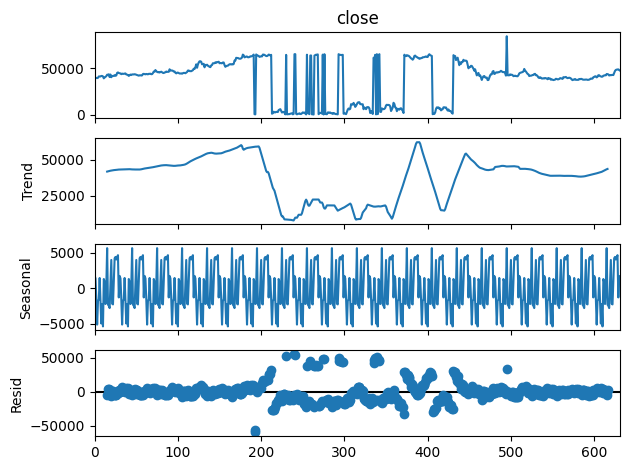

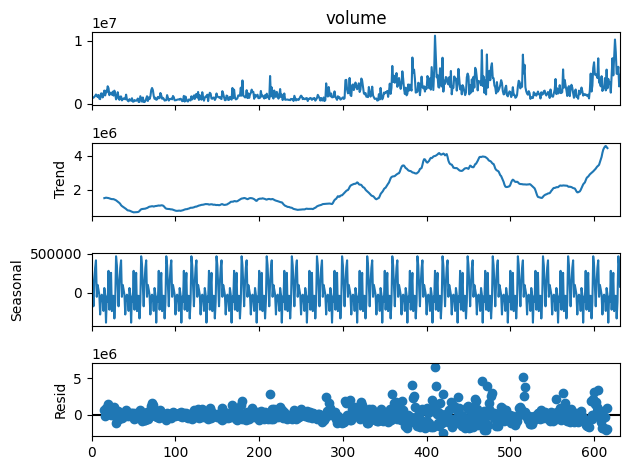

In [164]:
all_customers.plot_seasonal_decomposition()

Nhận xét 3: 
- Because the p_value is so small < 0.05, and the ADF Statistic is less than all Critial Values 1%, 2% and 5% so the 3 cols are stationary (not a random walk and can be predictable) 
https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide/notebook#TimeSeries-%F0%9F%93%88-ARIMA,-Prophet,-ADF,-PACF...-%F0%9F%93%9A-Beginner-to-Pro 
- Tất cả các cột ['PS_D_C', 'PS_D', 'PS_C','SL_GD'] đều có tính seasonal.  
- Các cột đều có trend đi lên 
- SLGD có resid khá lộn xộn nên sẽ khó dự đoán hơn